___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

##To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder ,OrdinalEncoder

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, make_scorer,roc_curve, auc ,\
                            classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score,\
                            RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, precision_recall_curve


from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier                             
from sklearn.compose import make_column_transformer
from xgboost import XGBClassifier


# to get rid of the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install xgboost

In [3]:
sklearn.__version__

'1.0.2'

In [4]:
xgboost.__version__

'1.6.2'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [5]:
df_f = pd.read_csv('ANSUR II FEMALE Public.csv')
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [6]:
df_m = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin-1') 
df_m.head()
# ERROR UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 1: invalid continuation byte
# FIX  pd.read_csv( encoding='latin-1') 

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


## Explore Data

In [7]:
df_f.shape # female dataframe shape

(1986, 108)

In [8]:
df_m.shape

(4082, 108)

In [9]:
# combined both dataframes 
#df= df_f.append(df_m, ignore_index=True) # merge both f & m datafream into one 
#OR 
df = pd.concat([df_m, df_f], axis=0, ignore_index=True)
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,NaN,285,1392,335,223,1297,252,196,368,299,...,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.0
6064,NaN,262,1324,301,202,1204,236,181,378,294,...,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.0
6065,NaN,260,1334,318,213,1259,234,183,363,332,...,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.0
6066,NaN,205,1293,302,199,1207,213,163,376,276,...,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.0


In [10]:
df.shape

(6068, 109)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
...,...,...,...,...,...,...,...,...
DODRace,6068.0,1.615030,0.979156,1.0,1.00,1.0,2.00,8.0
Age,6068.0,29.761206,8.674650,17.0,23.00,28.0,36.00,58.0
Heightin,6068.0,68.257251,3.861954,56.0,66.00,68.0,71.00,94.0
Weightlbs,6068.0,174.749670,33.691952,0.0,150.00,173.0,196.00,321.0


In [13]:
df.isna( ).sum( ).sort_values() #Return the number of missing values in each column

interscyei                0
suprasternaleheight       0
stature                   0
span                      0
sleeveoutseam             0
                       ... 
chestheight               0
Heightin                  0
subjectid              1986
SubjectId              4082
Ethnicity              4647
Length: 109, dtype: int64

In [14]:
df.select_dtypes(include='object') #to filter only object type features might drop

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Mexican,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Mexican,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,NaN,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Mexican,Right hand


White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64


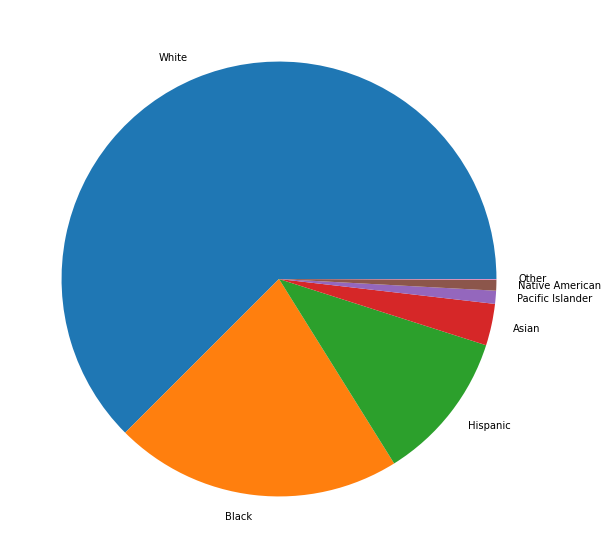

In [15]:
#Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)
df["DODRace"].value_counts().plot(kind = "pie", figsize=(10, 10))
plt.ylabel("")
print(df["DODRace"].value_counts())

In [16]:
#df.corr()['DODRace']

In [17]:
#df.DODRace.value_counts()[df.DODRace.value_counts() <= 500].index
# df.DODRace.index.value_counts().drop(labels=[4,5,6,8])
# df.DODRace

df = df[df["DODRace"].isin(["White", "Black", "Hispanic"])]
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,White,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,White,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,Black,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,White,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,Black,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,NaN,285,1392,335,223,1297,252,196,368,299,...,42A,Texas,3,Mexican,Hispanic,51,67,180,Right hand,29501.0
6064,NaN,262,1324,301,202,1204,236,181,378,294,...,25U,Texas,3,Mexican,Hispanic,40,63,150,Right hand,29502.0
6065,NaN,260,1334,318,213,1259,234,183,363,332,...,42A,Texas,2,NaN,Black,40,66,168,Right hand,29503.0
6066,NaN,205,1293,302,199,1207,213,163,376,276,...,92Y,Texas,3,Mexican,Hispanic,31,63,133,Right hand,29511.0


In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [20]:
df.shape

(5769, 109)

In [21]:
#drop uncessray coulmns 
df.drop(columns=["SubjectId","subjectid","Date",'Installation', 
                 'Component', 'Branch', 'PrimaryMOS', 'Ethnicity' ], inplace=True)

#'SubjectsBirthLocation'
#'WritingPreference'
df.reset_index(drop=True, inplace=True)
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,wristcircumference,wristheight,Gender,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,175,853,Male,North Dakota,1,White,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,167,815,Male,New York,1,White,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,180,831,Male,New York,2,Black,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,176,793,Male,Wisconsin,1,White,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,188,954,Male,North Carolina,2,Black,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,285,1392,335,223,1297,252,196,368,299,312,...,162,836,Female,Texas,3,Hispanic,51,67,180,Right hand
5765,262,1324,301,202,1204,236,181,378,294,287,...,157,804,Female,Texas,3,Hispanic,40,63,150,Right hand
5766,260,1334,318,213,1259,234,183,363,332,299,...,159,774,Female,Texas,2,Black,40,66,168,Right hand
5767,205,1293,302,199,1207,213,163,376,276,280,...,146,769,Female,Texas,3,Hispanic,31,63,133,Right hand


In [22]:
#convert catogirical to numerical data
# df['Gender'] = df['Gender'].replace(['Female', 'Male'], [0, 1])
#df['Gender']

<AxesSubplot:>

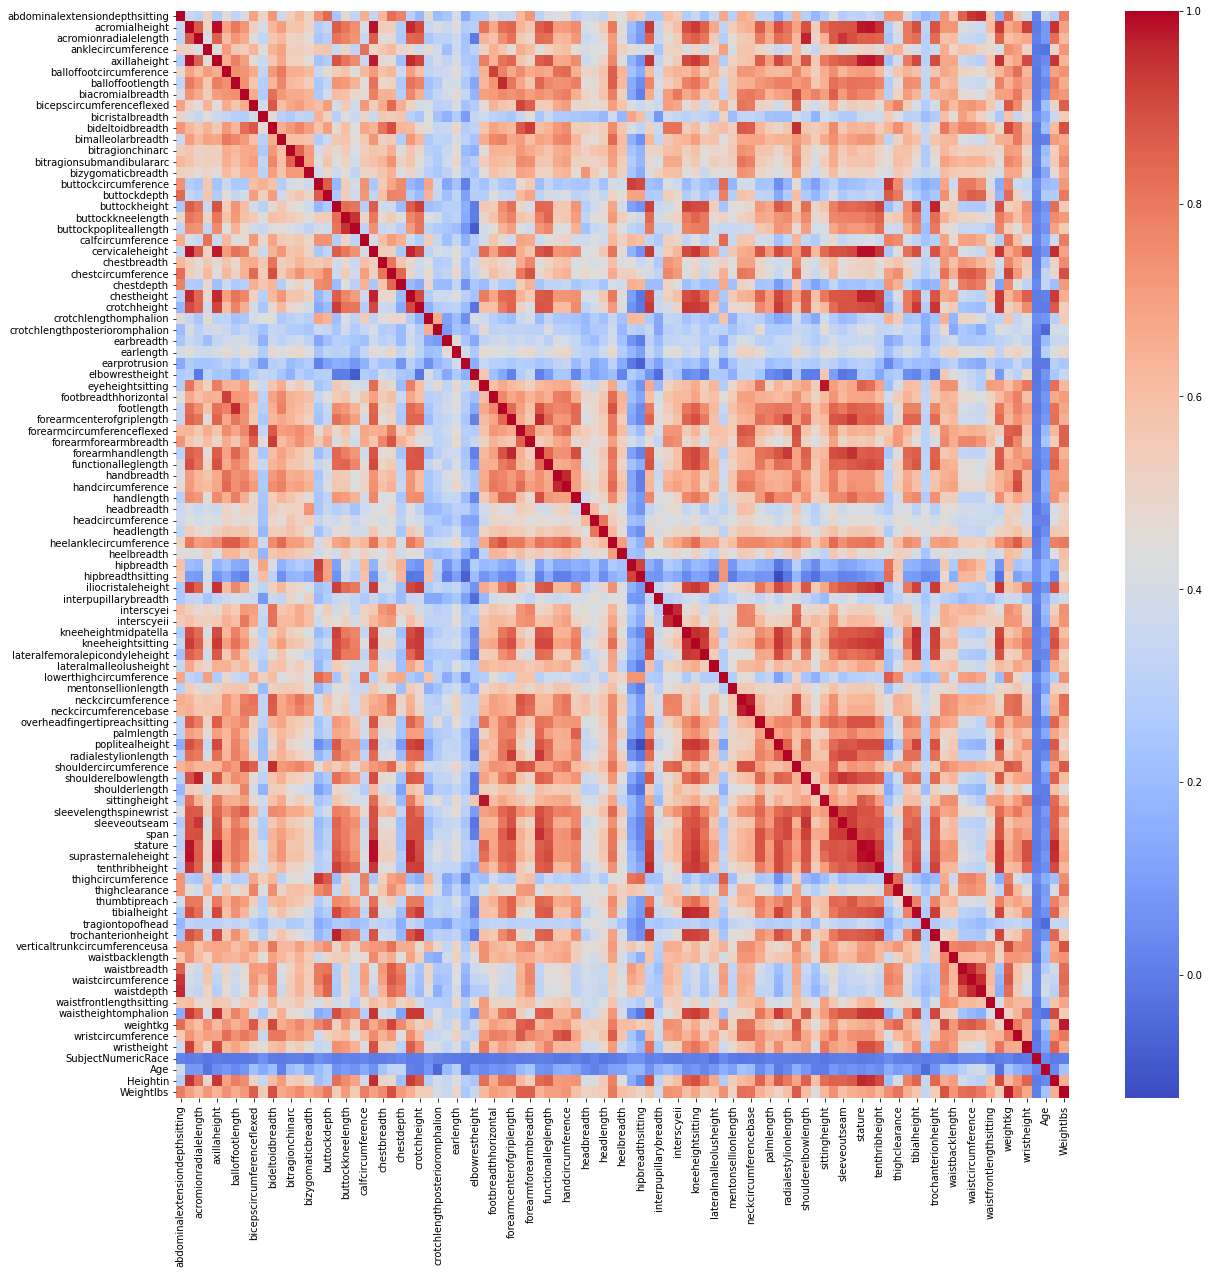

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),cmap="coolwarm")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [24]:
X = df.drop('DODRace',axis=1)
y = df['DODRace']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101, stratify=y)

In [26]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4326, 100)
Train target shape   :  (4326,)
Test features shape  :  (1443, 100)
Test target shape    :  (1443,)


In [27]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(100 * '-')
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [28]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [29]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False)

In [30]:
operations = [ ("OneHotEncoder", column_trans),("scaler", StandardScaler()), ("logistic", LogisticRegression())]

In [31]:
pipe_model = Pipeline(steps=operations)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [32]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [33]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[295   6  24]
 [ 12  97  61]
 [ 19  25 904]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91       325
    Hispanic       0.76      0.57      0.65       170
       White       0.91      0.95      0.93       948

    accuracy                           0.90      1443
   macro avg       0.86      0.81      0.83      1443
weighted avg       0.89      0.90      0.89      1443

----------------------------------------------------------------------------------------------------
Train_Set
[[ 922    8   43]
 [  16  336  157]
 [  19   61 2764]]
              precision    recall  f1-score   support

       Black       0.96      0.95      0.96       973
    Hispanic       0.83      0.66      0.74       509
       White       0.93      0.97      0.95      2844

    accuracy                           0.93      4326
   macro avg       0.91      0.86      0.88      4326
weighted avg       0.93      0.93      0.93      4326



### Logistic Model GridsearchCV

In [34]:
pipe_model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression())],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                   verbose_feature_names_out=False),
 'scaler': StandardScaler(),
 

In [35]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]

In [36]:
model = Pipeline(steps=operations)

In [37]:
penalty = ["l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None] 

In [38]:
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

In [39]:
cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

In [42]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   # By default, the score of the 1 class is max. it does.
                                                 #0 class that max. f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          #n_jobs = 1,
                          return_train_score=True)

# Since GridsearchCV also performs Cross Validation, we specify return_train_score=True
# to obtain validation and train set scores. (It just returns the metric score we wrote against the scoring)

In [ ]:
grid_model.fit(X_train, y_train)

In [ ]:
grid_model.best_estimator_

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

In [ ]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(C=19, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model 

In [ ]:
operations = [("OneHotEncoder", column_trans),
              ("SVC", SVC(class_weight="balanced", random_state=101)),]

In [ ]:
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
pipe_model = Pipeline(steps=operations)

In [ ]:
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
# we can't use the average_precision_score function with the y_test variable because it's not a binary
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.

y_pred = grid_model.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


In [ ]:
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

###  SVC Model GridsearchCV

In [ ]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [ ]:
operations = [(("OneHotEncoder", column_trans)), ("SVC", SVC(class_weight="balanced", random_state=101))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=10,
                              return_train_score=True)

In [ ]:
svm_model_grid.fit(X_train, y_train)

In [ ]:
svm_model_grid.best_estimator_

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

## 3. RF

### Vanilla RF Model

In [44]:
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

In [45]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

In [46]:
pipe_model_rf = Pipeline(steps=operations_rf)

In [47]:
pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [48]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[300   6  19]
 [ 24 111  35]
 [ 13  16 919]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       325
    Hispanic       0.83      0.65      0.73       170
       White       0.94      0.97      0.96       948

    accuracy                           0.92      1443
   macro avg       0.89      0.85      0.87      1443
weighted avg       0.92      0.92      0.92      1443

----------------------------------------------------------------------------------------------------
Train_Set
[[ 973    0    0]
 [   0  509    0]
 [   0    0 2844]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       973
    Hispanic       1.00      1.00      1.00       509
       White       1.00      1.00      1.00      2844

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

### RF Model GridsearchCV

In [50]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [400, 500],      # Number of trees in the forest
    'max_depth': [2, 3]     # Maximum depth of each tree
}

In [51]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101)),
]

In [52]:
model = Pipeline(steps=operations_rf)

In [53]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [54]:
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [ ]:
rf_grid_model.fit(X_train, y_train)

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [56]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [57]:
column_trans = make_column_transformer( (OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler(),
                                       verbose_feature_names_out=False)

In [58]:
operations_xgb = [("OrdinalEncoder", column_trans),("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               col...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                   

In [59]:
X_train

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,SubjectNumericRace,Age,Heightin,Weightlbs,WritingPreference
5503,265,1310,304,229,1210,226,190,362,329,278,...,762,152,792,Female,Illinois,1,25,64,170,Left hand
4911,223,1398,330,212,1307,252,193,377,305,260,...,704,155,833,Female,Barbados,8,51,67,155,Right hand
899,233,1351,317,206,1252,233,184,394,322,263,...,691,165,797,Male,Arkansas,1,31,66,154,Right hand
4203,203,1251,278,220,1160,228,175,355,302,273,...,701,146,783,Female,Ecuador,3,39,62,148,Right hand
3838,222,1391,318,228,1278,233,201,402,324,261,...,726,163,819,Male,Oklahoma,1,20,68,160,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,233,1394,320,222,1283,243,196,429,376,264,...,775,161,821,Male,Illinois,3,24,68,175,Right hand
1936,248,1554,362,231,1443,263,213,446,350,288,...,883,185,930,Male,Minnesota,1,40,75,198,Left hand
575,322,1526,351,238,1421,246,194,421,329,279,...,867,180,881,Male,California,1,40,73,196,Right hand
4435,220,1346,308,208,1253,242,188,384,270,251,...,613,152,790,Female,Hawaii,2,23,65,130,Right hand


In [60]:
y_train_xgb

5503    2
4911    0
899     2
4203    1
3838    2
       ..
2671    1
1936    2
575     2
4435    0
2865    2
Name: DODRace, Length: 4326, dtype: int64

In [61]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[313   3   9]
 [  5 155  10]
 [ 12  16 920]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       325
           1       0.89      0.91      0.90       170
           2       0.98      0.97      0.98       948

    accuracy                           0.96      1443
   macro avg       0.94      0.95      0.94      1443
weighted avg       0.96      0.96      0.96      1443

----------------------------------------------------------------------------------------------------
Train_Set
[[ 973    0    0]
 [   0  509    0]
 [   0    0 2844]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       973
           1       1.00      1.00      1.00       509
           2       1.00      1.00      1.00      2844

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [62]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([0.50703235, 1.48201439, 0.50703235, ..., 0.50703235, 1.48201439,
       0.50703235])

In [63]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
5503,0.507032,2
4911,1.482014,0
899,0.507032,2
4203,2.833006,1
3838,0.507032,2


In [64]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               col...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                   

In [65]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[315   4   6]
 [  5 160   5]
 [ 12  16 920]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       325
           1       0.89      0.94      0.91       170
           2       0.99      0.97      0.98       948

    accuracy                           0.97      1443
   macro avg       0.94      0.96      0.95      1443
weighted avg       0.97      0.97      0.97      1443

----------------------------------------------------------------------------------------------------
Train_Set
[[ 973    0    0]
 [   0  509    0]
 [   0    0 2844]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       973
           1       1.00      1.00      1.00       509
           2       1.00      1.00      1.00      2844

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [66]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

# Since xgb does not accept non-encoded targets, we arrange the scoring_xgb
# according to the 1 numeric class corresponding to hispanics.

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

### XGBoost Model GridsearchCV

In [68]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [69]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

In [ ]:
xgb_grid_model.best_estimator_

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler(),
)

In [ ]:
X_train_ohe = column_trans.fit_transform(X_train)

# First, we manually transform X_train and X_test' one hot encoder.

In [ ]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

# over_sampling(smote) and under_sampling (RandomUnderSampler) apply to X_train and y_train only.
# If it is applied to all the data and then separated into data train and test set,
# data_leakage will occur and your scores will overestimated.
# The data should be split into train and test set first and then applied only to the train data.

In [ ]:
y_train_over.value_counts()

# As you can see, all classes after smote are equal to the number of
# observations of the majority class, white.

# However, equating or approximating the minority class to the majority
# class will result in overfitting of the model. Therefore, the number of observations
# belonging to the minority class should be increased in a controlled manner
# to avoid overfitting.

In [ ]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# With the sampling_strategy hyperparameter, we can increase or decrease
# the classes however we want.

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
# We automate our over_sampling and under_sampling processes.
steps = [("o", over), ("u", under)]
from imblearn.pipeline import Pipeline as imbpipeline

pipeline = imbpipeline(steps=steps)

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to 2500.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

## Logistic Regression Over/ Under Sampling

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler(),
)

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
]  # ("scaler", MinMaxScaler())

# When over or under sampling is applied to data, class_weight="balanced" is never used.

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [ ]:
final_model.fit(X, y)

In [ ]:
X[X.Gender == "Male"].describe()

# We will make predictions on the model based on the average
# values of all male soldiers in our data.

In [ ]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

In [ ]:
final_model.predict(pd.DataFrame(male_mean_human).T)

# we can say that the average values of male soldiers are very
# close to Hispanic soldiers.

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___